To open notebook in Colab please click below:
<a href="https://colab.research.google.com/github/bwolfson2/foster_2020/blob/master/Module8_Causality/Confounded_analytics_intro.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>'

In [0]:
#If opening in colab run this cell
!git clone https://github.com/bwolfson2/foster_2020
%cd foster_2020/Module8_Causality

Cloning into 'foster_2020'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (199/199), done.
remote: Compressing objects: 100% (162/162), done.
remote: Total 308 (delta 70), reused 158 (delta 31), pack-reused 109
Receiving objects: 100% (308/308), 60.59 MiB | 21.35 MiB/s, done.
Resolving deltas: 100% (109/109), done.
Checking out files: 100% (125/125), done.
/content/foster_2020/Module8_Causality


# Finding the best consultant

You work for McKeen Sea, a consulting firm. One of McKeen Sea's most important customers has requested an additional consultant, and you've been tasked to find the best one available out of two potential candidates: Aaron and Ben. Fortunately, McKeen Sea has collected some data on the past performance of these consultants, and so you would like to use the data to make a better decision. 

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from ds_utils.sample_data import get_project_data

data = get_project_data()
data.head()

,Consultant,Customer,Project,Service,Performance
6,Aaron,New,Large,Old,0.222222
22,Aaron,Old,Large,New,0.555556
57,Ben,New,Large,New,0.111111
15,Aaron,Old,Large,New,0.555556
40,Aaron,Old,Small,Old,1.000000


In [0]:
data.Consultant.value_counts()

Aaron    48
Ben      48
Name: Consultant, dtype: int64

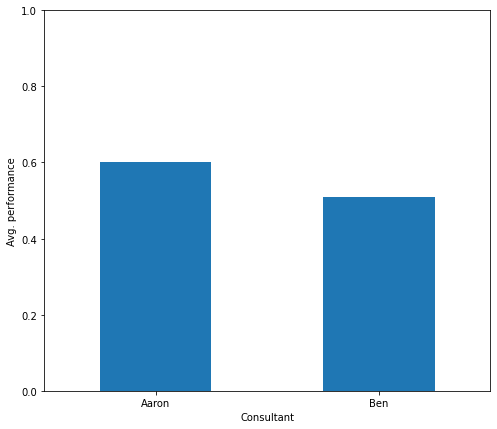

In [0]:
# Some auxiliar functions for plotting
def plot_avg_performance(data, groups=None):
    plot_auxiliar(data, groups, True)
    
def plot_number_of_projects(data, groups=None):
    plot_auxiliar(data, groups, False)

def plot_auxiliar(data, groups, mean=True):
    if groups is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 7))
        if mean:
            data.groupby(['Consultant']).Performance.mean().plot(kind='bar', rot=0, ax=ax)
            plt.ylabel('Avg. performance')
            plt.ylim((0, 1))
        else:
            data.groupby(['Consultant']).Performance.size().plot(kind='bar', rot=0, ax=ax)
            plt.ylabel('# of projects')
    else:
        grouped = data.groupby(groups)
        rows = int(grouped.ngroups/2)
        fig, axs = plt.subplots(figsize=(16,7*rows), nrows=rows, ncols=2, gridspec_kw=dict(hspace=0.4))
        targets = zip(grouped.groups.keys(), axs.flatten())
        for i, (key, ax) in enumerate(targets):
            if mean:
                grouped.get_group(key).groupby('Consultant').Performance.mean().plot(kind='bar', rot=0, ax=ax)
                ax.set_ylabel('Avg. performance')
                ax.set_ylim((0, 1))
            else:
                grouped.get_group(key).groupby('Consultant').Performance.size().plot(kind='bar', rot=0, ax=ax)
                ax.set_ylabel('# of projects')
            key_s = []
            if type(key) is not tuple:
                key = (key,)
            for j, elem in enumerate(key):
                key_s.append(elem + ' ' +  groups[j])
            ax.set_title(' | '.join(key_s))

plot_avg_performance(data)

Would this information be useful to assess if Aaron will perform better than Ben? What happens if we split the data by customer?

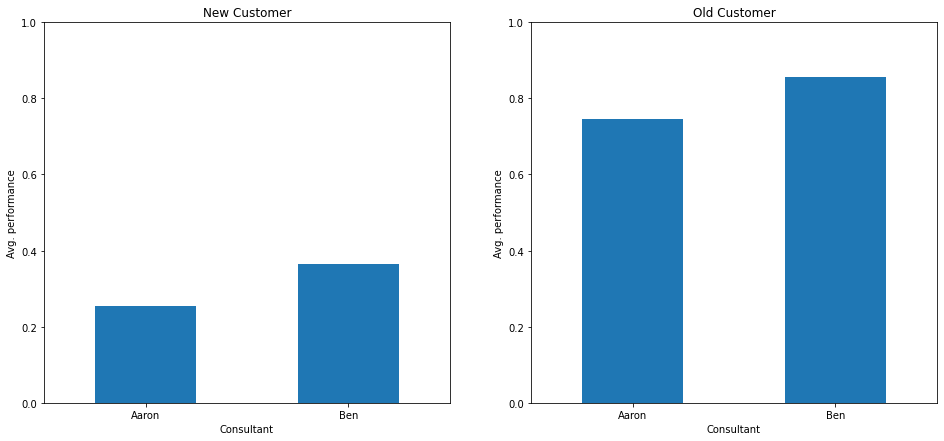

In [0]:
plot_avg_performance(data, groups=['Customer'])

Ben performs better than Aaron, both with new AND old customers! How can this be possible? 